<a href="https://colab.research.google.com/github/PamelaCSilva/ImersaoDados2020/blob/main/DesafioImersaoDados_Enem2019_PamelaCouto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados Essenciais

In [ ]:
estado = "sp"

In [ ]:
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

--2021-04-09 15:40:38--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/sp.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip [following]
--2021-04-09 15:40:38--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip [following]
--2021-04-09 15:40:39--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.gi

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv(arquivo, delimiter=';')
dados.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,12426,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EEACECDBADBEABAAEAEACAAAECBEEEBACACCDEDACADCB,ADBBE99999DEDDBCAAAEEDDDBAADCCACECDCAEBCBCEBBA...,EDBADBDBAECBBB*CBADBAECCBACECDEDECBACCECDCCAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,180.0,200.0,200.0,940.0,H,E,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,B,B
1,14849,190001019476,2019,3538204,Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,B,B,4,C,A,B,D,A,B,B,A,A,A,A,A,A,B,A,A,C,A,B,A
2,15223,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,BCDCABABABBCBAEEEBCACACAEDBCCAEBEABEADBAEACCB,BDABE99999BCBDADDBDCDAAECDEECDBCBCCDEDAACDEDBB...,DBEBAECBADCACECADBBBBCEBADCEABECAADDBEDDBAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,200.0,200.0,200.0,880.0,E,E,F,B,6,D,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,A,A
3,20246,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,AC.BECDABAECBCBBEAACA.EDCDEAEAADCEABDAAACEBCC,99999CBEAEBBCEDBABEBDAADCEAEDEBBEACACACACDCEDB...,ADDCEEEDADABDBDAAACAECEBBABEBDBEEBADCEBDEDCDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B,B,B,B,4,C,A,C,D,B,B,B,A,B,B,B,A,B,B,B,A,B,B,A,B
4,20303,190001024931,2019,3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,3,C,A,B,C,A,B,B,A,A,A,B,A,A,A,A,A,C,B,B,B


In [ ]:
totalPessoas = dados["SG_UF_RESIDENCIA"].value_counts()
totalPessoas

SP    813772
Name: SG_UF_RESIDENCIA, dtype: int64

In [ ]:
totalPorRenda = dados["Q006"].value_counts()
totalPorRenda

C    185879
E    106606
D     97932
B     78354
G     77112
F     53915
H     48689
I     36600
J     20006
Q     16392
N     16117
A     15621
K     14465
O     12833
P     11361
M     11026
L     10864
Name: Q006, dtype: int64

In [ ]:
dadosInternet = ["Q025 "]
dados["Q025"] = dados[dadosInternet]
dadosInternet.append("Q025")

In [ ]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")
 
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q025,NU_NOTA_TOTAL
0,12426,190001017053,2019,3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EDBADBDBAECBBB*CBADBAECCBACECDEDECBACCECDCCAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,200.0,180.0,200.0,200.0,940.0,H,E,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,B,B,B,3283.5
2,15223,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,DBEBAECBADCACECADBBBBCEBADCEABECAADDBEDDBAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,200.0,200.0,200.0,880.0,E,E,F,B,6,D,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,A,A,A,3463.4
3,20246,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,ADDCEEEDADABDBDAAACAECEBBABEBDBEEBADCEBDEDCDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B,B,B,B,4,C,A,C,D,B,B,B,A,B,B,B,A,B,B,B,A,B,B,A,B,B,2289.8
5,26422,190001031050,2019,3515103,Embu-Guaçu,35,SP,17,F,1,3,1,1301902.0,Itacoatiara,13.0,AM,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,DDCDBBEDDAEEECAEABABEECEAEDDEABEDBACECCADDADB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,D,G,A,D,4,G,A,B,C,A,B,B,A,B,A,A,A,A,C,B,A,D,A,B,B,B,2292.8
8,40801,190001045429,2019,3518800,Guarulhos,35,SP,23,F,1,1,1,3550308.0,São Paulo,35.0,SP,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,ADDEEEAADDEBAECBCDBACECEAACABCACADEDCEABECADB,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,200.0,180.0,180.0,160.0,880.0,E,F,B,D,4,J,A,C,D,A,A,B,B,B,A,B,A,B,C,B,B,D,B,B,B,B,3577.6


In [ ]:
rendaOrdenada = dados["Q006"].unique()
rendaOrdenada.sort()
rendaOrdenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

In [ ]:
dados_estudo_publico = dados_sem_nota_zero.query("TP_ESCOLA == 2")
dados_estudo_publico.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q025,NU_NOTA_TOTAL
3,20246,190001024874,2019,3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,ADDCEEEDADABDBDAAACAECEBBABEBDBEEBADCEBDEDCDA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B,B,B,B,4,C,A,C,D,B,B,B,A,B,B,B,A,B,B,B,A,B,B,A,B,B,2289.8
5,26422,190001031050,2019,3515103,Embu-Guaçu,35,SP,17,F,1,3,1,1301902.0,Itacoatiara,13.0,AM,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,DDCDBBEDDAEEECAEABABEECEAEDDEABEDBACECCADDADB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,D,G,A,D,4,G,A,B,C,A,B,B,A,B,A,A,A,A,C,B,A,D,A,B,B,B,2292.8
10,45854,190001050482,2019,3549805,São José do Rio Preto,35,SP,18,F,1,1,1,1501402.0,Belém,15.0,PA,2,0,2,1.0,0,35028927.0,3549805.0,São José do Rio Preto,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,CDBECDAEDECBABACADBADDEDAEDBABAAEBEACBAECDBAE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,160.0,120.0,80.0,100.0,580.0,D,E,C,B,3,C,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,A,A,2731.5
27,107433,190001112062,2019,3517703,Guará,35,SP,17,F,1,3,1,2200202.0,Água Branca,22.0,PI,2,0,2,1.0,0,35023310.0,3517703.0,Guará,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,DBBCBDCBDDEDCABEEBDBABEEABCBEBEDACDCDCDEBCCEA,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,120.0,140.0,160.0,120.0,680.0,B,B,A,B,5,D,A,B,B,A,A,B,A,A,A,A,A,A,B,B,A,D,A,A,B,B,2803.7
28,114973,190001119602,2019,3509205,Cajamar,35,SP,17,F,1,2,1,2207009.0,Oeiras,22.0,PI,2,0,2,1.0,0,22083480.0,2209377.0,Santa Rosa do Piauí,22.0,PI,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,DCBCABCAADECEDEABBCAECEBECDBECECDBACDCADBCDDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,180.0,120.0,120.0,120.0,660.0,A,D,F,B,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,B,B,2640.6


In [ ]:
escolaPublicaPorRenda = dados_estudo_publico["Q006"].value_counts()
escolaPublicaPorRenda

C    49977
E    30899
D    23740
G    21887
B    20305
F    13093
H    10322
I     8218
A     3209
J     3206
K     2523
L     1332
N     1324
M     1225
O      832
P      460
Q      345
Name: Q006, dtype: int64

In [ ]:
dados_estudo_particular = dados_sem_nota_zero.query("TP_ESCOLA == 3")
dados_estudo_particular.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q025,NU_NOTA_TOTAL
2,15223,190001019850,2019,3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,DBEBAECBADCACECADBBBBCEBADCEABECAADDBEDDBAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,200.0,200.0,200.0,880.0,E,E,F,B,6,D,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,A,A,A,3463.4
40,190303,190001194936,2019,3550308,São Paulo,35,SP,18,F,1,1,1,2111300.0,São Luís,21.0,MA,2,0,3,1.0,0,35132287.0,3550308.0,São Paulo,35.0,SP,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,ABACBBCCADAADBCCABADBBDDCCDBACADEEDADBEBDDCEA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,140.0,160.0,160.0,760.0,F,F,E,E,3,N,C,C,D,B,A,B,B,B,A,B,A,B,C,B,B,D,B,C,B,B,3059.9
123,297254,190001301888,2019,3520103,Igarapava,35,SP,17,F,1,1,1,3520103.0,Igarapava,35.0,SP,2,0,3,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,DCEBABCAADCACEAABEECBCACEDDDBEDAAACDCEACABDCB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,160.0,160.0,180.0,180.0,840.0,E,F,D,E,5,E,C,D,E,C,A,C,C,B,A,B,A,A,C,A,B,D,B,B,B,B,3482.0
125,297528,190001302162,2019,3550308,São Paulo,35,SP,18,F,1,1,1,3151503.0,Piumhi,31.0,MG,2,0,3,1.0,0,35103433.0,3550308.0,São Paulo,35.0,SP,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,AACCDCBADBACDDCBABCACDDCECCDBCBBDACDBBEAEDCBA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,140.0,200.0,140.0,180.0,200.0,860.0,F,G,E,D,2,N,B,B,C,A,A,B,B,B,A,B,A,A,B,A,B,C,A,B,B,B,3255.0
298,565390,190001570033,2019,3509502,Campinas,35,SP,17,M,1,1,1,3509502.0,Campinas,35.0,SP,2,0,3,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,ABCAEBECDDEBDBEBCECCBDAACDCDADBBDDBCACEDEBDCC,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,140.0,120.0,140.0,160.0,160.0,720.0,E,E,D,D,5,H,A,E,E,C,A,D,A,B,B,B,B,B,D,A,B,D,B,D,B,B,3041.7


In [ ]:
escolaPrivadaPorRenda = dados_estudo_particular["Q006"].value_counts()
escolaPrivadaPorRenda

H    5760
Q    5596
G    5170
I    5060
N    4169
J    3654
E    3545
O    3525
P    3396
F    3369
D    2695
K    2688
M    2560
C    2541
L    2415
B     703
A     373
Name: Q006, dtype: int64

# O impacto das escolas nas notas do Enem

Não é de hoje a discussão sobre a qualidade do ensino no nosso país como um todo. A conversa é complexa e há vários fatores que precisamos considerar quando vamos analisar se as coisas estão boas, ruins e o que pode melhorar.

Nesse ponto, o Enem é útil para nos ajudar a mapear as deficiências existentes no atual sistema e medir o rendimento das pessoas.

O primeiro ponto que podemos analisar é a distribuição dos candidados por tipo de escola:

Text(0.5, 1.0, 'Proporção de candidatos por tipo de escola')

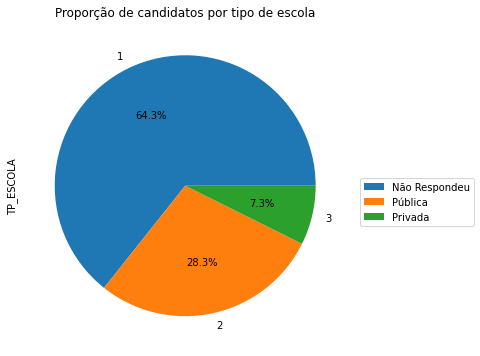

In [ ]:
#@title
legenda = ['Não Respondeu','Pública','Privada']
dados["TP_ESCOLA"].value_counts().plot.pie(figsize=(6,6), autopct = '%1.1f%%')
plt.legend(legenda, ncol=1, loc='center right', bbox_to_anchor=(0.9,0.2,0.5,0.5))
plt.title('Proporção de candidatos por tipo de escola')

**Ok, não esperava ver esse volume de pessoas sem responder essa questão!** 

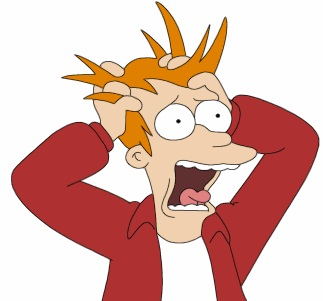

...

Mas calma! O gráfico abaixo ajuda a estimar onde essas pessoas estão. Analisemos:

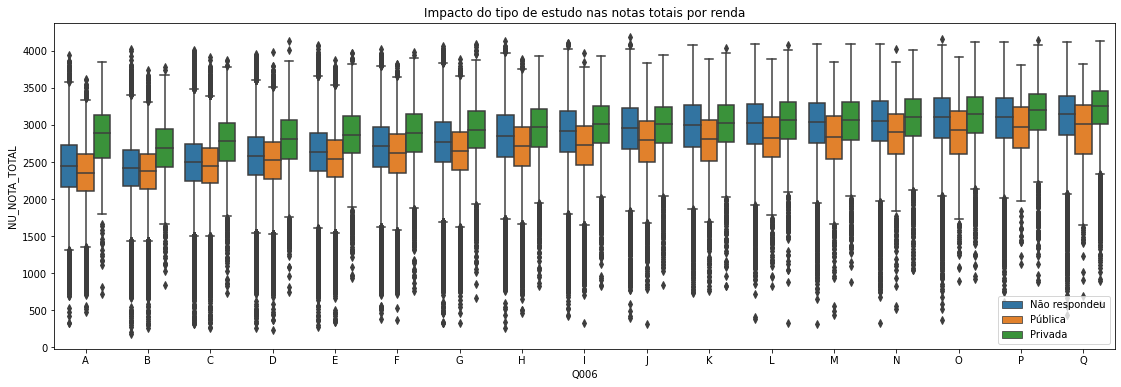

In [ ]:
#@title
tipo_escolas = ['Não Respondeu', 'Pública', 'Privada']

plt.figure(figsize=(19,6))
plt.title("Impacto do tipo de estudo nas notas totais por renda")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_sem_nota_zero, order=rendaOrdenada, hue="TP_ESCOLA")
L=plt.legend()
L.get_texts()[0].set_text('Não respondeu')
L.get_texts()[1].set_text('Pública')
L.get_texts()[2].set_text('Privada')

Veja que á partir do grupo I a barra azul fica praticamente no mesmo nível que a barra verde, então as notas dos que não responderam seu tipo de ensino está bem próxima das notas do pessoal da escola privada.

Os grupos G e H me deixam na dúvida, mas do grupo A ao F a barra azul fica mais próximo da laranja, indicando que esse grupo em incógnita pode ser do ensino público.

Lógico que essa distribuição que tracei aqui não é 100% correta e estou apenas a usando para estimar mesmo.

Ver por esse lado ajuda, mas ainda não nos permite avaliar como fica esse número no total, então vejamos de quantas pessoas estamos olhando por essa lógica:

In [ ]:
escola_n_respondido = dados.query("TP_ESCOLA == 1")["Q006"].value_counts()
escola_n_respondido

C    120467
D     66918
E     66415
B     51033
G     46908
F     35377
H     31337
I     22332
J     12746
A     10935
N     10343
Q     10035
K      8948
O      8271
P      7326
M      7043
L      6915
Name: Q006, dtype: int64

Vamos supor que as pessoas do grupo A ao G estudam em escola pública e do grupo H ao Q são de escola privada.

Ficamos então com **398.053** pessoas na escola **pública**.
Mais **125.296** de pessoas na escola **privada**.

Somando esses valores com o que já tínhamos, vejamos como ficou o gráfico agora:

In [ ]:
len(dados.query("TP_ESCOLA == 2"))

230655

In [ ]:
len(dados.query("TP_ESCOLA == 3"))

59768

Text(0.5, 1.0, 'Proporção de candidatos por tipo de escola atualizada')

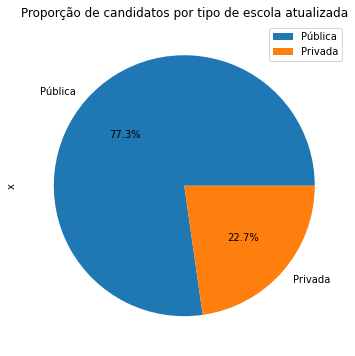

In [ ]:
#@title
PropEstimadas_TpEscola = pd.DataFrame([628708, 185064], index=['Pública', 'Privada'], columns=['x'])
PropEstimadas_TpEscola.plot.pie(figsize=(6,6), autopct = '%1.1f%%', subplots=True)
plt.title('Proporção de candidatos por tipo de escola atualizada')

Particularmente acredito que a proporção do ensino privado é menor que o estimado, mas não oculta a forte indicação de que a maioria no estado estuda/estudou em escola pública. 

As próximas análises serão feitas com base nos dados de candidados do ensino público e privado e a aplicaremos as conclusões para a proporção que definimos para as pessoas que não responderam.

Dito isto, vamos comparar o rendimento desses grupos:

## O impacto do tipo de escola nas notas

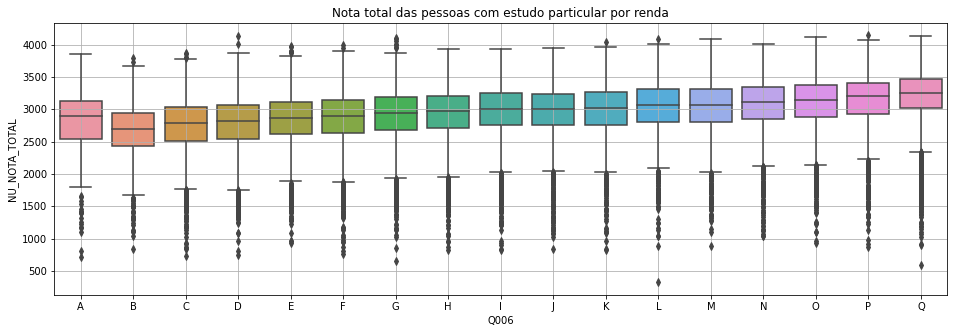

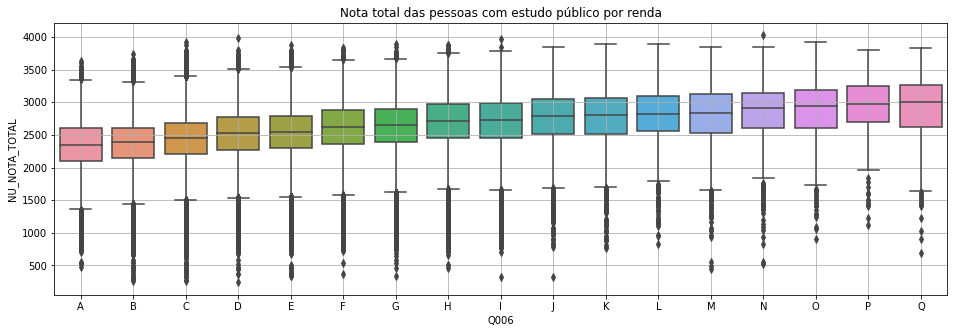

In [ ]:
#@title
plt.figure(figsize=(16,5))
plt.title("Nota total das pessoas com estudo particular por renda")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_estudo_particular, order=rendaOrdenada)
plt.grid(True)

plt.figure(figsize=(16,5))
plt.title("Nota total das pessoas com estudo público por renda")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_estudo_publico, order=rendaOrdenada)
plt.grid(True)

Fica nítido a diferença que há entre o ensino público e privado. Independente da renda, quem está na escola pública tem notas menores.

Interesante o destaque no rendimento do grupo A no ensino privado em relação aos outros grupos de renda baixa, como B e C. Indica que as pessoas desse grupo nem sempre estão fadadas a tirar as menores notas do Enem.

Mas vale ressaltar que mesmo com esse destaque, a nota ainda é menor do que as do grupo G em diante. Isso nos diz que ter ensino privado não é o único fator que leva à uma nota máxima. Também evidencia que mesmo havendo destaques de rendimento, os grupos de renda mai baixa ainda apresentam desvantagem.

## O impacto da internet nas notas

Text(0.5, 1.0, 'Proporção de quem tem internet em casa')

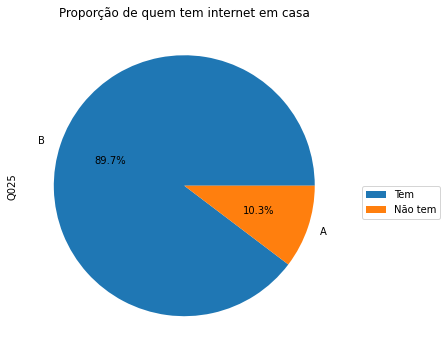

In [ ]:
#@title
legenda = ['Tem','Não tem']
dados["Q025"].value_counts().plot.pie(figsize=(6,6), autopct = '%1.1f%%',)
plt.legend(legenda, ncol=1, loc='center right', bbox_to_anchor=(0.8,0.2,0.5,0.5))
plt.title('Proporção de quem tem internet em casa')

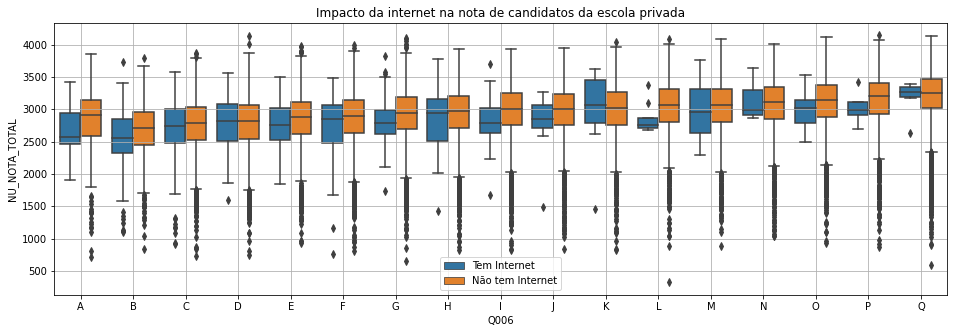

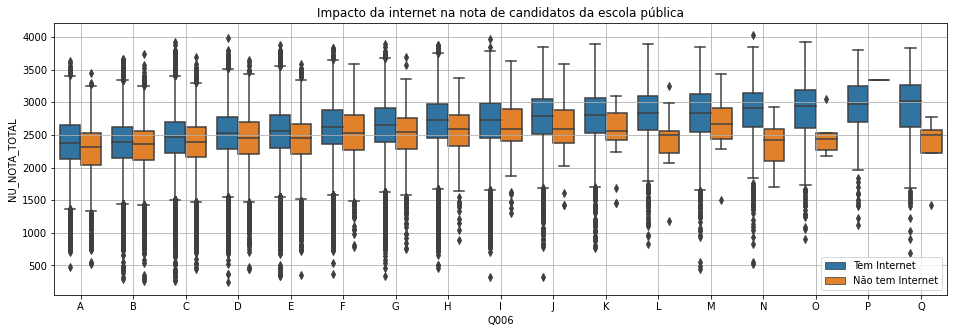

In [ ]:
#@title
plt.figure(figsize=(16,5))
plt.title("Impacto da internet na nota de candidatos da escola privada")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_estudo_particular, order=rendaOrdenada, hue="Q025")
plt.grid(True)
L=plt.legend()
L.get_texts()[0].set_text('Tem Internet')
L.get_texts()[1].set_text('Não tem Internet')

plt.figure(figsize=(16,5))
plt.title("Impacto da internet na nota de candidatos da escola pública")
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_estudo_publico, order=rendaOrdenada, hue="Q025")
plt.grid(True)
L=plt.legend()
L.get_texts()[0].set_text('Tem Internet')
L.get_texts()[1].set_text('Não tem Internet')

Perceba que a internet não tem muito impacto no ensino privado, mas faz a diferença para alunos do ensino público!


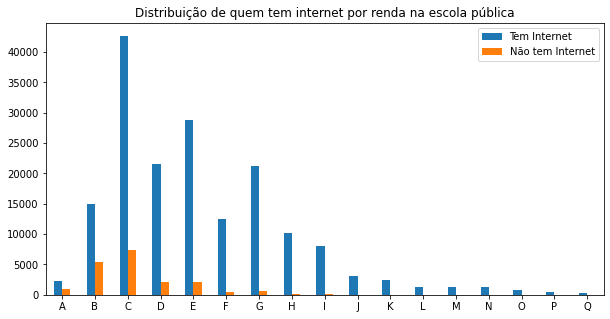

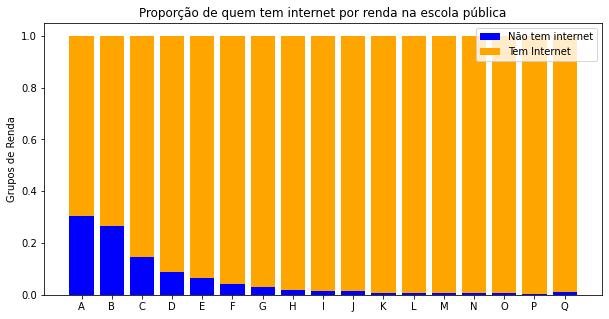

In [ ]:
#@title
comInternet = dados_estudo_publico.query("Q025 == 'B '")["Q006"].value_counts()
semInternet = dados_estudo_publico.query("Q025 == 'A '")["Q006"].value_counts()
 
index = rendaOrdenada
 
internetPorRenda = pd.DataFrame({
    'Tem Internet' : comInternet,
    'Não tem Internet' : semInternet},
    index = index
    )
grafico = internetPorRenda.plot.bar(rot=0, figsize=(10,5))
plt.title("Distribuição de quem tem internet por renda na escola pública")

#-----------------------
comInternetProp = comInternet/escolaPublicaPorRenda
semInternetProp = semInternet/escolaPublicaPorRenda

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(rendaOrdenada, semInternetProp, label='Não tem internet',  color="Blue")
ax.bar(rendaOrdenada, comInternetProp, bottom=semInternetProp, label='Tem Internet', color="Orange")


ax.set_ylabel('Proporção')
ax.set_ylabel('Grupos de Renda')
ax.set_title('Proporção de quem tem internet por renda na escola pública')
ax.legend()

plt.show()

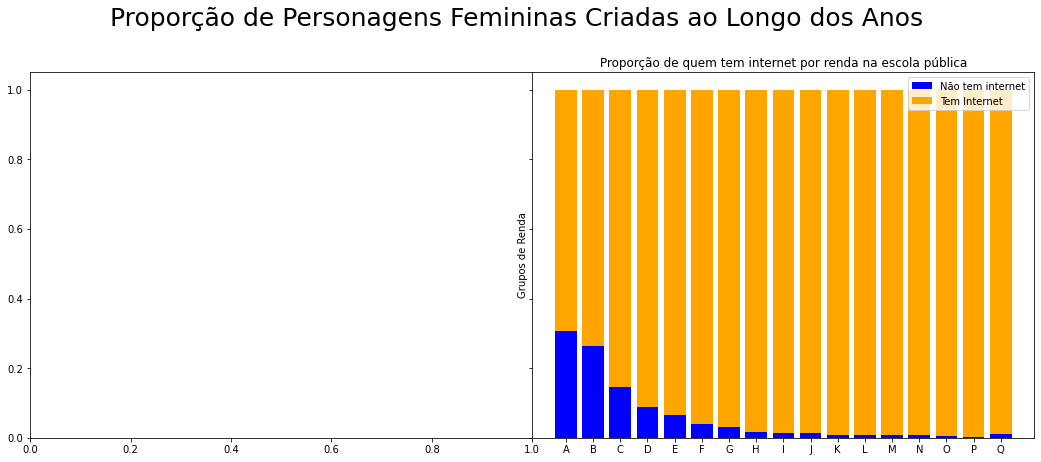

In [ ]:
#Tabelas
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(18,7),sharey=True,gridspec_kw={'hspace': 0, 'wspace': 0})
fig.subplots_adjust(top=0.85)
plt.suptitle('Proporção de Personagens Femininas Criadas ao Longo dos Anos', fontsize=25)

comInternet = dados_estudo_publico.query("Q025 == 'B '")["Q006"].value_counts()
semInternet = dados_estudo_publico.query("Q025 == 'A '")["Q006"].value_counts()
 
index = rendaOrdenada

comInternetProp = comInternet/escolaPublicaPorRenda
semInternetProp = semInternet/escolaPublicaPorRenda

ax1.bar(rendaOrdenada, semInternetProp, label='Não tem internet',  color="Blue")
ax1.bar(rendaOrdenada, comInternetProp, bottom=semInternetProp, label='Tem Internet', color="Orange")


ax1.set_ylabel('Proporção')
ax1.set_ylabel('Grupos de Renda')
ax1.set_title('Proporção de quem tem internet por renda na escola pública')
ax1.legend()

plt.show()

Ao total temos 19.468 pessoas que não possuem internet dentre as 398.053 que estão/estiveram na escola pública. 

E mais uma vez, quem sai em desvantagem são as pessoas mais pobres.


In [ ]:
len(dados_estudo_publico.query("Q025 == 'A '"))

19468

## O lar como local de estudos

Estudar e expandir os conhecimentos não se faz apenas na escola. Além da lição de casa, há trabalhos escolares e projetos que fazemos em casa. Para quem faz técnico ou faculdade, fará parte do TCC em casa. Até mesmo para quem apenas quer conhecer algo novo, aperfeiçoar uma habilidade ou aprofundar um conhecimento, ela fará isso em seu tempo livre em casa!

Pensando em como o ambiente que vivemos pode afetar nossa produtividade e concentração para trabalho e estudos, resolvi analisar a pergunta 9 do Questionário Socioecônomico sobre quantos quartos há na casa do candidato e ver se é visível algum impacto nas notas.

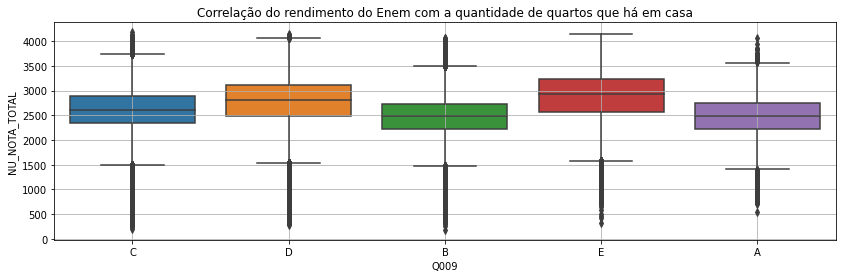

In [ ]:
#@title
plt.figure(figsize=(14,4))
plt.title("Correlação do rendimento do Enem com a quantidade de quartos que há em casa")
sns.boxplot(x="Q009", y="NU_NOTA_TOTAL", data=dados_sem_nota_zero)
plt.grid(True)

Veja que os menores rendimentos são das pessoas que tem um ou nenhum quarto em casa, resposta A e B.

Faz sentido se pensarmos que alguém nessas condições, caso não more sozinha, tem de divir o mesmo ambiente com várias pessoas e não tem um lugar próprio para se concentrar unicamente com os estudos.

Text(0.5, 1.0, 'Distribuição por renda de pessoas que tem um ou nenhum quarto em casa')

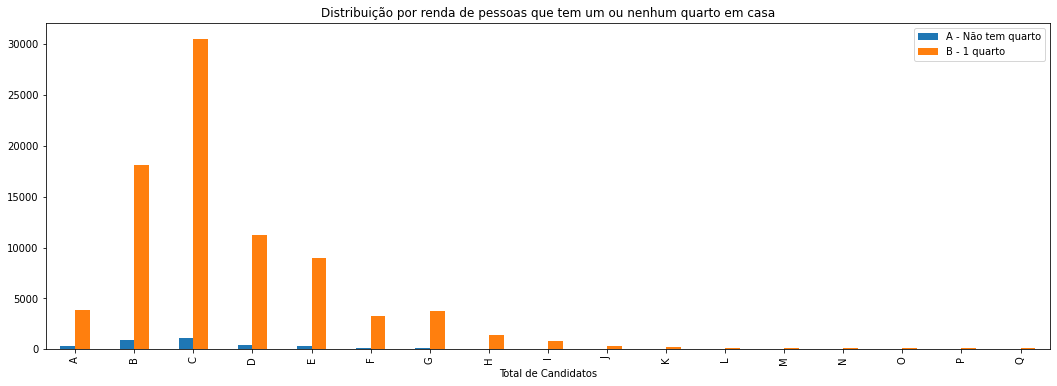

In [ ]:
#@title
respAPorRenda = dados_sem_nota_zero.query("Q009 == 'A'")["Q006"].value_counts()
respBPorRenda = dados_sem_nota_zero.query("Q009 == 'B'")["Q006"].value_counts()

index = rendaOrdenada
 
totalrespA = pd.DataFrame({
    'A - Não tem quarto' : respAPorRenda,
    'B - 1 quarto' : respBPorRenda},
    index = index
    )
grafico = totalrespA.plot.bar(figsize=(18,6))
plt.xlabel('Total de Candidatos')
plt.title("Distribuição por renda de pessoas que tem um ou nenhum quarto em casa")

## Quem está no lado em desvantagem?

Não irei me prolongar com esse tema, já que a discussão sobre o racismo é frequente, ainda mais esse ano com o movimento Black Lives Matter. 

A primeira coisa que quero analisar é a distribuição da cor das pessoas que participaram do Enem.

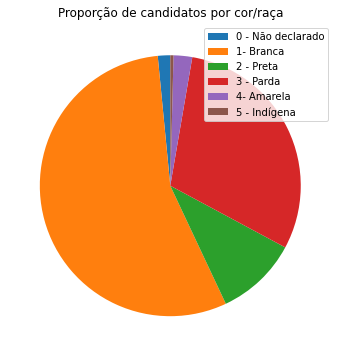

In [ ]:
#@title
cores = ['0 - Não declarado', '1- Branca', '2 - Preta', '3 - Parda', '4- Amarela', '5 - Indígena']
inscritos = dados['TP_COR_RACA'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(x=inscritos, startangle=90)
plt.legend(cores, ncol=1, loc='upper right')
plt.title('Proporção de candidatos por cor/raça')
plt.show()

Perceba que a maioria é branca e a diferença de proporção entre pessoas brancas e pretas é grande! Segundo o CENSO de 2010, a maioria de São Paulo era branca, de fato, mas trago a reflexão de qual resultado podemos esperar para o novo CENSO. Hoje falamos mais abertamente sobre dívida histórica, apagamento cultural e busca de nossas raízes. 

Quero trazer uma reflexão sobre o conceito de cor "parda" e como as pessoas se definirem assim pode ser problemático para qualquer análise sócioeconômica. 

Desconsiderando aqueles que se disseram pardos apenas para conseguir cota, tenho a hipótese de que parte dessas pessoas não querem ou não sabem definir sua própria cor e raça, a única certeza é que ela não se vê como branca ou vive num ambiente que não a considera clara suficiente para ser branca. A questão é: **qual a proporção das que não sabem se definir e as que não querem se definir?**

Os dados do Enem justamente poderiam nos ajudar a analisar se pessoas nitidamente não-brancas, porém claras tem condições melhores, amplamente falando, do que pessoas negras ou indígenas de cores mais retintas.
Também seria super interessante se tivéssemos como mensurar mais acertivamente as pessoas por suas misturas! Quantas pessoas são mestiças de brancas com negras, amarelas com negras, por exemplo e analisar se há diferenças na vivência de cada tipo de "mestiçagem".

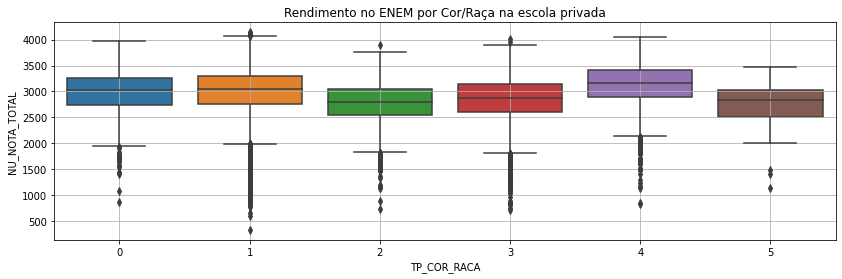

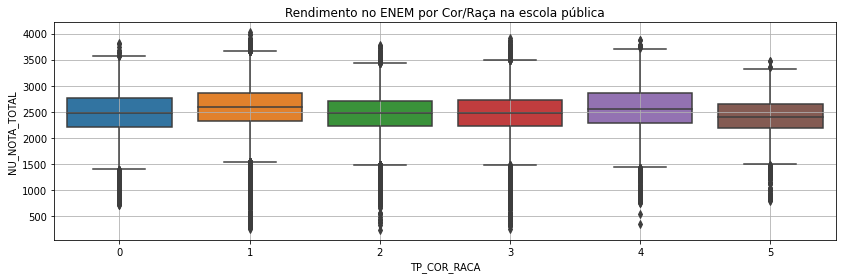

In [ ]:
#@title
plt.figure(figsize=(14,4))
plt.title("Rendimento no ENEM por Cor/Raça na escola privada")
sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_TOTAL", data=dados_estudo_particular)
plt.grid(True)

#---------------------
plt.figure(figsize=(14,4))
plt.title("Rendimento no ENEM por Cor/Raça na escola pública")
sns.boxplot(x="TP_COR_RACA", y="NU_NOTA_TOTAL", data=dados_estudo_publico)
plt.grid(True)


Na escola pública x privada, a lógica de quem está no ensino privado tem rendimento melhor no ENEM também se aplica para a visão de cor/raça.

Mas veja que no ensino privado, são as pessoas negras e indígenas que tem o menor rendimento e as pessoas pardas tiveram notas melhores. No ensino público essa diferença entre pretas x pardas é menor.

O gráfico evidencia de novo que ensino privado não é sinônimo de nota máxima. Internet e o ambiente que o candidato vive também impacta no rendimento, mas em todos os casos vemos uma têndencia da desvantagem pender para o lado dos grupos de renda mais baixas.

Text(0.5, 1.0, 'Distribuição de pessoas por renda')

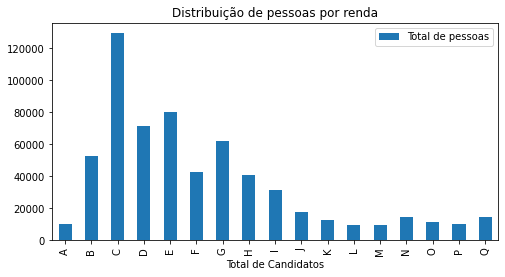

In [ ]:
#@title
pessoasPorRenda = dados_sem_nota_zero["Q006"].value_counts()
 
index = rendaOrdenada
 
totalPessoasPorRenda = pd.DataFrame({
    'Total de pessoas' : pessoasPorRenda},
    index = index
    )
grafico = totalPessoasPorRenda.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Distribuição de pessoas por renda")

Aqui já vemos que a maioria dos candidatos estão concentrados na classe C, seguida da classe D, F e B. Sendo assim, quando analisamos a desvantagem ao qual os grupos de renda mais baixas se encontram, não estamos falando de números tão pequenos.

Agora vamos olhar mais atentamente para a relação cor/raça x grupo de renda. 

Primeiro analisaremos a proporção que ela representa em cada grupo de renda e olharemos como estão distribuídas as pessoas por tipo de escola.

### Pessoas brancas

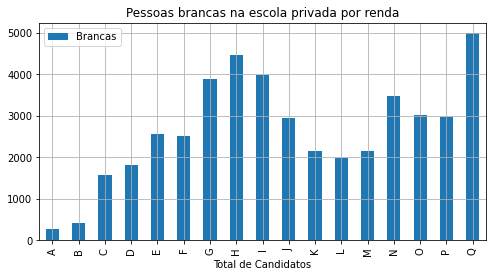

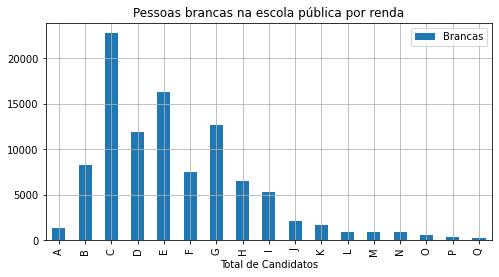

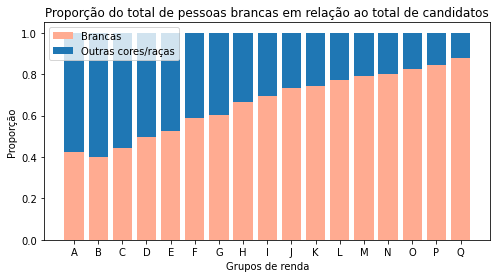

In [ ]:
#@title
brancas = dados_estudo_particular.query("TP_COR_RACA == 1")['Q006'].value_counts()
 
index = rendaOrdenada
 
brancasNoParticular = pd.DataFrame({
    'Brancas' : brancas},
    index = index
    )
grafico = brancasNoParticular.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas brancas na escola privada por renda")
plt.grid(True)
#------------------------------

brancas = dados_estudo_publico.query("TP_COR_RACA == 1")['Q006'].value_counts()
 
index = rendaOrdenada
 
brancasNoPublico = pd.DataFrame({
    'Brancas' : brancas},
    index = index
    )
grafico = brancasNoPublico.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas brancas na escola pública por renda")
plt.grid(True)

#---------------------------------

brancas = dados.query("TP_COR_RACA == 1")['Q006'].value_counts()
brancasProp = brancas/totalPorRenda
outrasCoresProp = (totalPorRenda-brancas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, brancasProp, label='Brancas', color="#FFAB91")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=brancasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_xlabel('Grupos de renda')
ax.set_title('Proporção do total de pessoas brancas em relação ao total de candidatos')
ax.legend()

plt.show()

Observe o grupo A e B no primeiro gráfico. O número é alto se comparado à outras etnias, mas analisando como as pessoas brancas estão distribuídas dentro do ensino privado, há poucas pessoas no grupo A e B.

O gráfico também mostra que no geral, a escola particular tem em sua maioria pessoas brancas da classe Q. A segunda maioria é a classe H.

Também é interessante ver a proporção de como as pessoas brancas estão distribuídas entre os grupos no terceiro gráfico. A proporção aumenta nos grupos mais altos de renda.

### Pessoas pretas

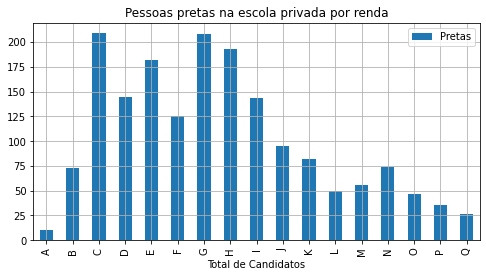

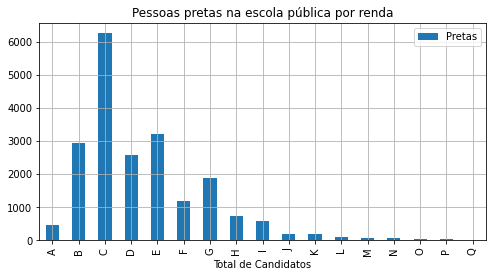

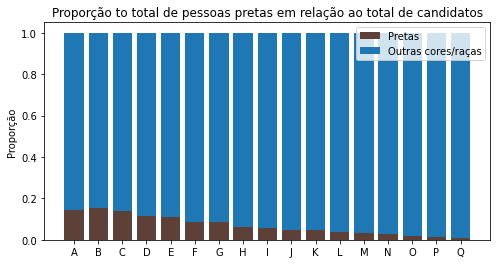

In [ ]:
#@title
pretas = dados_estudo_particular.query("TP_COR_RACA == 2")['Q006'].value_counts()

index = rendaOrdenada
 
pretasNoParticular = pd.DataFrame({
    'Pretas' : pretas},
    index = index
    )
grafico = pretasNoParticular.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas pretas na escola privada por renda")
plt.grid(True)
#------------------------------

pretas = dados_estudo_publico.query("TP_COR_RACA == 2")['Q006'].value_counts()
 
index = rendaOrdenada
 
pretasNoPublico = pd.DataFrame({
    'Pretas' : pretas},
    index = index
    )
grafico = pretasNoPublico.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas pretas na escola pública por renda")
plt.grid(True)
#-------------------------------

pretas = dados.query("TP_COR_RACA == 2")['Q006'].value_counts()
pretasProp = pretas/totalPorRenda
outrasCoresProp = (totalPorRenda-pretas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, pretasProp, label='Pretas', color="#5D4037")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=pretasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_title('Proporção to total de pessoas pretas em relação ao total de candidatos')
ax.legend()

plt.show()

Aqui há a mesma tendência do número de pessoas na escola privada ser menor que na pública, porém, observe que a diferença entre as escalas dos dois gráficos é bem maior comparada à essa relação nos gráficos de pessoas brancas.

Pelo primeiro gráfico também vemos que poucas são as pessoas pretas nos grupos mais altos de renda.

Aqui também vemos o oposto na questão de proporção nos grupos. No geral, as pessoas estão concentradas nos grupos mais baixos e a proporção vai diminuindo conforme a renda aumenta.

### Pessoas pardas

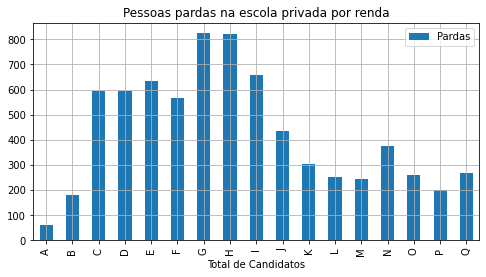

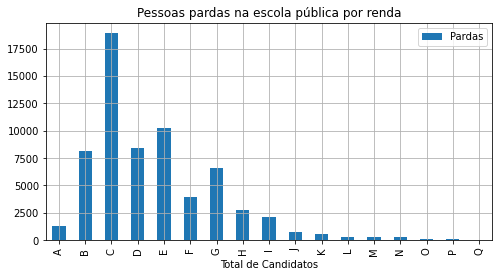

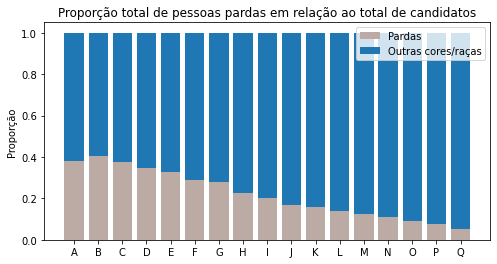

In [ ]:
#@title
pardas = dados_estudo_particular.query("TP_COR_RACA == 3")['Q006'].value_counts()
 
index = rendaOrdenada
 
pardasNoParticular = pd.DataFrame({
    'Pardas' : pardas},
    index = index
    )
grafico = pardasNoParticular.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas pardas na escola privada por renda")
plt.grid(True)
#------------------------------

pardas = dados_estudo_publico.query("TP_COR_RACA == 3")['Q006'].value_counts()
 
index = rendaOrdenada
 
pardasNoPublico = pd.DataFrame({
    'Pardas' : pardas},
    index = index
    )
grafico = pardasNoPublico.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas pardas na escola pública por renda")
plt.grid(True)
#---------------------------------

pardas = dados.query("TP_COR_RACA == 3")['Q006'].value_counts()
pardasProp = pardas/totalPorRenda
outrasCoresProp = (totalPorRenda-pardas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, pardasProp, label='Pardas', color="#BCAAA4")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=pardasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_title('Proporção total de pessoas pardas em relação ao total de candidatos')
ax.legend()

plt.show()


Para todos os gráficos vemos um comportamento similar como os gráficos de pessoas pretas, apenas apresentando números maiores proporcionalmente falando.

### Pessoas amarelas

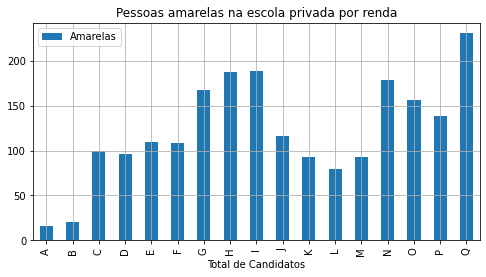

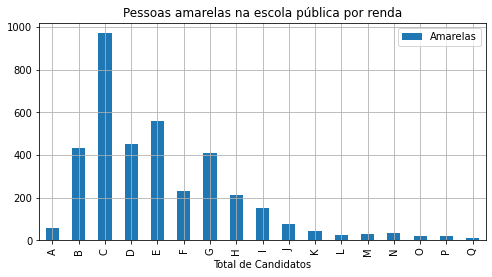

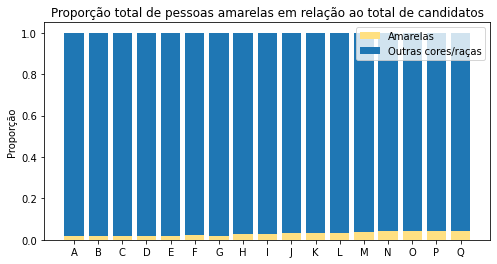

In [ ]:
#@title
amarelas = dados_estudo_particular.query("TP_COR_RACA == 4")['Q006'].value_counts()
 
index = rendaOrdenada
 
amarelasNoParticular = pd.DataFrame({
    'Amarelas' : amarelas},
    index = index
    )
grafico = amarelasNoParticular.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas amarelas na escola privada por renda")
plt.grid(True)
#------------------------------

amarelas = dados_estudo_publico.query("TP_COR_RACA == 4")['Q006'].value_counts()
 
index = rendaOrdenada
 
amarelasNoPublico = pd.DataFrame({
    'Amarelas' : amarelas},
    index = index
    )
grafico = amarelasNoPublico.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas amarelas na escola pública por renda")
plt.grid(True)
#---------------------------------

amarelas = dados.query("TP_COR_RACA == 4")['Q006'].value_counts()
amarelasProp = amarelas/totalPorRenda
outrasCoresProp = (totalPorRenda-amarelas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, amarelasProp, label='Amarelas', color="#FFE082")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=amarelasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_title('Proporção total de pessoas amarelas em relação ao total de candidatos')
ax.legend()

plt.show()

Aqui vemos um comportamento mais similar com os gráficos das pessoas brancas, mas numa escala bem menor.

### Pessoas indígenas

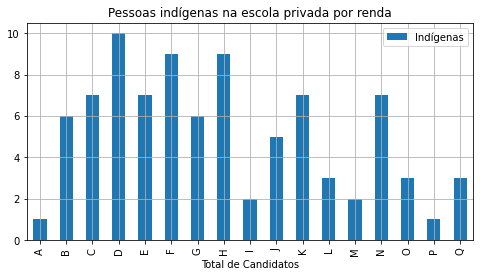

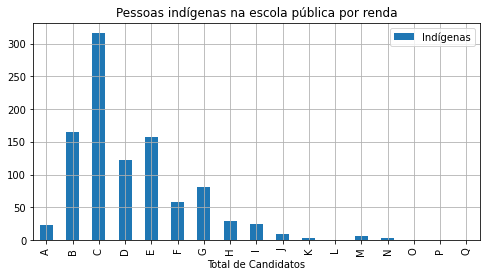

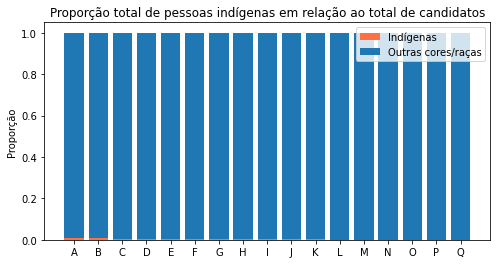

In [ ]:
#@title
indigenas = dados_estudo_particular.query("TP_COR_RACA == 5")['Q006'].value_counts()
 
index = rendaOrdenada
 
indigenasNoParticular = pd.DataFrame({
    'Indígenas' : indigenas},
    index = index
    )
grafico = indigenasNoParticular.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas indígenas na escola privada por renda")
plt.grid(True)
#------------------------------

indigenas = dados_estudo_publico.query("TP_COR_RACA == 5")['Q006'].value_counts()
 
index = rendaOrdenada
 
indigenasNoPublico = pd.DataFrame({
    'Indígenas' : indigenas},
    index = index
    )
grafico = indigenasNoPublico.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Pessoas indígenas na escola pública por renda")
plt.grid(True)
#---------------------------------

indigenas = dados.query("TP_COR_RACA == 5")['Q006'].value_counts()
indigenasProp = indigenas/totalPorRenda
outrasCoresProp = (totalPorRenda-indigenas)/totalPorRenda

fig, ax = plt.subplots(figsize=(8,4))

ax.bar(rendaOrdenada, indigenasProp, label='Indígenas', color="#FF7043")
ax.bar(rendaOrdenada, outrasCoresProp, bottom=indigenasProp, label='Outras cores/raças')

ax.set_ylabel('Proporção')
ax.set_title('Proporção total de pessoas indígenas em relação ao total de candidatos')
ax.legend()

plt.show()

Aqui a atenção vai para os números em si. O total de pessoas indígenas no ENEM são a verdeira minoria.

A distribuição delas nos grupos dentro do ensino privado até que tem uma distribuição mais dispersa comparado aos casos anteriores, mas quando vamos falar da proporção dessas pessoas no geral, vemos no gráfico 3 que maior parte está nos grupos mais baixos.

**Resumindo:**

Os dados indicam que no lado onde se encontram as rendas há uma proporção maior de pessoas brancas e amarelas que também apresentaram as melhores notas.

Nas rendas mais baixas se concentra as pessoas pretas, pardas e indígenas.

## Pessoas trans: Um caso nítido de invisibilidade social

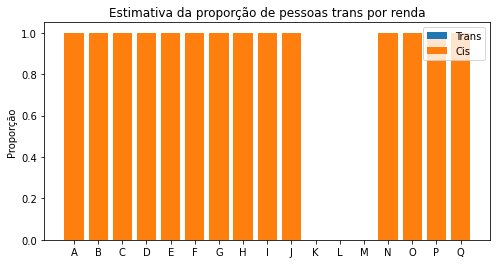

Text(0.5, 1.0, 'Total de pessoas trans e cis')

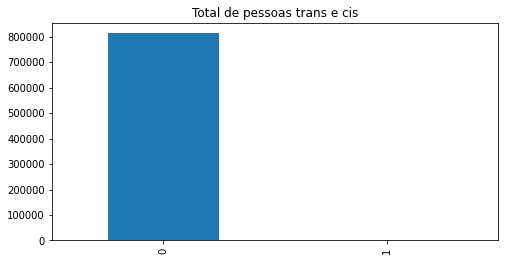

In [ ]:
#@title
trans = dados.query("IN_NOME_SOCIAL == 1")["Q006"].value_counts()
cis = dados.query("IN_NOME_SOCIAL == 0")["Q006"].value_counts()

transProp = trans/(trans+cis)
cisProp = cis/(trans+cis)
 
fig, ax = plt.subplots(figsize=(8,4))
 
ax.bar(rendaOrdenada, transProp, label='Trans')
ax.bar(rendaOrdenada, cisProp, bottom=transProp, label='Cis')
 
ax.set_ylabel('Proporção')
ax.set_title('Estimativa da proporção de pessoas trans por renda')
ax.legend()
 
plt.show()
#--------------------------------------
#@title
dados["IN_NOME_SOCIAL"].value_counts().plot.bar(figsize=(8,4))
plt.title('Total de pessoas trans e cis')

Mapear em números a diversidade presente na sociedade no geral não é tarefa fácil, mas falar de pessoas trans é ainda mais complicado.

Os dois gráficos acima faz parecer que não há nada no lado das pessoas que se inscreveram com o nome social, mas na verdade, estamos falando de 91 pessoas dentre 800.000.

O problema começa com o fato de não termos números concretos sobre o total de pessoas trans existentes no Brasil e a distribuição delas na sociedade, o que temos são estimativas de associações que se interessam pelos direitos e visibilidade dessas pessoas. A ANTRA (Associação Nacional de Travestis e Transexuais) estima que o Brasil tenha 1,9% de pessoas trans.

No caso de São Paulo, existe um projeto de mapeamento que começou em Janeiro de 2020 feito pela Coordenação de Políticas LGBTI da Prefeitura de São Paulo, do Centro de Estudos de Cultura Contemporânea – CEDEC. 

A ideia inicial era reunir cerca de 30 pesquisadores para sair às ruas em busca dessas pessoas, já que parte delas infelizmente se encontra em situação de rua e na prostituição. Com a Covid-19 foi necessário mudar o método de pesquisa, agora ela é feita pela internet e telefone. Ainda não foi apresentado nenhum número concreto, mas estima-se que seja mapeado cerca de 3.000 pessoas trans na cidade de São Paulo.

In [ ]:
len(dados.query("IN_NOME_SOCIAL == 1"))

91

Text(0.5, 1.0, 'Distribuição de pessoas trans por renda')

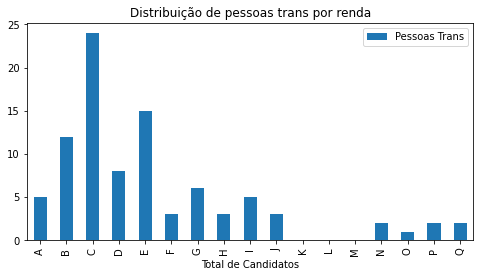

In [ ]:
#@title
pessoasTrans = dados.query("IN_NOME_SOCIAL == 1")["Q006"].value_counts()
 
index = rendaOrdenada
 
transPorRenda = pd.DataFrame({
    'Pessoas Trans' : pessoasTrans},
    index = index
    )
grafico = transPorRenda.plot.bar(figsize=(8,4))
plt.xlabel('Total de Candidatos')
plt.title("Distribuição de pessoas trans por renda")

**Por que se importar com esse tipo de minoria?**

Ainda mais quando o número que ela representa não parece gerar muito impacto na sociedade mesmo que ela tenha oportunidades e privilégios iguais ou próximos à população média, mas além da questão ética, vou trazer aqui uma frase do Nail Degrasse Tyson como um bom motivo para se importar:

"... o próximo Einstein talvez esteja morrendo de fome na Etiópia, e a gente nunca saberá, porque é uma criança sem comida."

Nail Tyson soltou essa frase em 2016 numa entrevista para o El Pais ao falar da relação da negação da ciência com a desigualdade. Ainda sobre esse ponto, ele complementa:

"Se Isaac Newton tivesse nascido na África, acho que nunca teria conseguido chegar aonde chegou. Iria só se preocupar em não morrer. É verdade que ele se mudou para o campo a fim de evitar a peste em Londres, então sabia, sim, o que fazer para sobreviver nesse contexto. Mas, se perdermos gente assim na infância, estaremos reprimindo o avanço da nossa própria civilização. Uma das grandes tragédias da atualidade é que nem todo mundo tenha a oportunidade de ser tudo o que pode."

Apesar dele citar a África, esse pensamento se aplica para qualquer condição de pobreza ou desvantagem social. Quantas pessoas não excluímos por acharmos que elas não tem muito à oferecer à sociedade, seja por conta de preconceito ou desdém? Pessoas trans, pessoas neuroatípicas ou imigrantes de países vizinhos que buscam no Brasil oportunidades de viver dignamente suas vidas e qualquer uma delas tem o potencial de revolucionar a ciência, elas só precisam das condições para poderem se dedicar à ciência.

## Como igualar as oportunidades?

Sobre a diferença do ensino público e privado não há muito o que falar baseando-se apenas nos dados do ENEM 2019. Há uma série de fatores que podem motivar essa diferença e para identificá-los precisaríamos olhar para dados de gestão, organização e rendimento das próprias instituições de ensino.

Dois fatores que vimos ter impacto significante no rendimento no ENEM: internet e um quarto próprio, mas são situações que também não temos muito controle. Há lugares que não há estrutura para internet e não temos como garantir que todas as pessoas tenham um espaço isolado em casa para melhorar o rendimento nos estudos. 

Minimizar a desigualdade em grande escala é um desafio, pois requer estudos em várias áreas para traçar soluções e ações eficazes. Estamos falando de todo um sistema que requer muito cuidado e um olhar atento para mudá-lo. Também não é possível fazê-lo de uma hora para outra, então o que nos resta?

## Talvez o Hapkido possa nos ajudar!

O Hapkido é uma arte marcial focada em defesa pessoal, e sim, eu sei que parece loucura trazer à tona uma arte marcial que pratiquei enquanto estamos refletindo sobre caminhos para melhorar o ensino no estado de São Paulo e minimizar a desigualdade, mas vai fazer sentido, prometo!

Artes marciais não são apenas formas de aprendermos a nos defender e/ou machucar o amiguinho, elas tem toda uma filosofia por trás que pode ajudar o praticante a ver o mundo de outras formas e se tornar uma pessoa melhor através dela. Com o Hapkido não é diferente e o cerne de sua filosia está no próprio nome: **HAP** - União, **KI** - Energia, **DO** - Caminho.

Sabe o KI de DragonBall? Aquela energia que potencializa nossas capacidades e nos ajuda a ter resistência para o combate? O KI é basicamente isso mesmo... Nós só não viramos Super Sayajins e nem lançamos Kame-Hame-Ha, mas é através do aparfeiçoamento do controle da nossa energia que conseguimos aplicar golpes eficientemente.

O caminho de um aluno de Hapkido consiste em buscar o aperfeiçoamento de suas técnicas e do controle do KI. Esse aperfeiçoamento vem não apenas da prática da repetição, mas também da prática de ajudar quem está do lado a se aperfeiçoar também. No Hapkido, um faixa branca (o grau mais baixo) conquistando a sua primeira ponta amarela é tão valioso quanto alguém conquistando a faixa preta (o grau mais alto). É por isso que o esforço é coletivo para que todos possam subir um degrau, independente do tamanho que esse degrau seja. Seguimos o caminho do HAP.

Eu acredito que essa metodologia pode ser aplicada na educação. Não será fácil, não poderá ser aplicada de qualquer forma e teremos de estabelecer muito bem as medidas dentro da estrutura de ensino para que funcione em longa escala. 

Apesar de tudo, acredito que podemos alcançar esse objetivo.

# A Imersão Dados é Hapkido!

Não, ninguém tentou se bater e não foi discutido formas de soltar Kame-hame-ha, mas houve uma união muito bacana dentro do servidor do Discord para fazer os desafios e passar conhecimento para ajudar aqueles que tiveram mais dificuldade com o entendimento das aulas. Me surpreendi com o ambiente saudável e acolhedor que fluiu naturalmente sem precisar de um pontapé inicial.

Essa experiência foi o que justamente me fez pensar no Hapkido como ferramenta de reflexão. Quando usei o meu exemplo como praticante da Arte Marcial, me referi à um ambiente com 10 à 20 pessoas, mas com o servidor exclusivo da Imersão, estamos falando de uma escala maior e o mais incrível: já criaram outro servidor para continuar esse processo mútuo de aprendizado! 

Então sim, enquanto não conseguimos soluções concretas para o atual sistema de ensino, podemos trabalhar juntos para compartilhar o conhecimento e nos certificar que chegue à todos. Só temos a ganhar colaborando juntos, principalmente agora na pandemia. 

É essencial mantermos esse espírito de colaboração mútua, pois além da pandemia, temos outros desafios que nos aguardam e que afetarão negativamente nossas vidas enquanto sociedade: economia pós-pandemia, aquecimento global e esgotamento de recursos naturais. Teremos de lidar com esses problemas em algum momento e a nossa melhor arma é o conhecimento e não seremos capazes de vencer os desafios que aguardam nossa sociedade se esse conhecimento estiver nas mãos de apenas alguns.



# O desafio de se obter informações concretas
Apesar da brincadeira que fiz sobre as pessoas que não responderam o tipo de escola que frenquentaram, o primeiro dado que me chocou foi a proporção de pessoas que assinalaram a opção "parda". Já estava com a expectativa de haver diferença na proporção de pessoas brancas e pretas, mas desconsiderei totalmente a existência de pessoas pardas e não esperava que fosse a maioria no Brasil.

Pelo menos aqui em São Paulo, vemos mais pessoas pretas ganhando espaço para falar e há toda uma conversa sobre apagamento de raízes ao longo da história do Brasil. É através desse movimento que as pessoas não brancas estão refletindo mais sobre suas origens e aceitar a sua matriz africana, caso a tenha. É por estar ciente desse movimento que desconsiderei totalmente a existencia da cor parda.

E então fiz o gráfico pizza.

Esses são dois exemplos de problemas com a informação em sua origem, é até curioso ver que para os padrões de 2019, o questionário do ENEM chega a ser antiquado em certos aspectos, como não oferecer a opção "Outros" para o gênero, não separar gênero de sexualidade e não oferecer opções mais diversa de etnia e nem colocar a opção "Não sei" para essa questão, afinal, dependendo do contexto, alguém respondendo "Não sei" pode ter muito mais à dizer do que uma ausência de resposta.

O fato das informações serem obtidas por autodeclaração também é problemática por N fatores. Pessoas podem mentir, podem esquecer, pular questão se assim for possível ou se confundir.

Para isso a tecnologia nos dá a solução, temos até as ferramentas, basta trabalhar um pouquinho para fazê-las funcionar. Veja, temos o Score do Serasa como um dos meios para validar a renda, Cad Único para validar o número de pessoas que convivem com o candidato, há N informações sobre as pessoas que estão legalmente na rede, é preciso apenas localizar, integrar e conseguir a permissão para usar.

É a melhor solução? Não! Estamos falando de um processo muito incisivo, sendo compreensível ter uma reação negativa por parte das pessoas que podem se sentir desconfortáveis por essas informações terem sido consultadas sem o consentimento delas.

Então como recolher informações concretas sem uso tão incisivo da tecnologia? Há alguma forma das pessoas serem mais assertivas? Pensei numa espécie de entrevista para confirmar dados declarados, assim a entrevistadora não só pode perceber possíveis erros no cadastro, se certificar que todas as questões foram respondidas e até colocar algumas observações que podem ser relevantes para análises como as que estamos fazendo, mas é impraticável levando em conta o volume de pessoas que se inscrevem para o Enem.

O fato é que o questionário do ENEM precisa mudar, algumas perguntas precisam de mais opções de respostas por mais que seja chato para quem vai respondê-las, o questionário precisa ser ainda mais robusto. Particularmente acho mais fácil ter uma fonte de dados com muita irformação e filtrarmos essas informações para visualização mais simples e prática do que lidar com pouca e/ou vaga informação e termos que ficar adivinhando o que aquilo representa se formos analisar além da superfície do dado.

# Para finalizar...
É com orgulho que finalizo esse desafio final perto do tempo limite!

Não consegui explorar tudo que queria, pois emperrei um pouco com algumas dificuldades aqui e alí para gerar os gráficos, entender erros no código, então acabei perdendo certo tempo, mas estou muito feliz que consegui fazer o desafio ao menos com os principais pontos que queria abordar sem ficar muito bagunçado!

Sou grata à comunidade no servidor do Discord que me ajudou muito e também à toda a equipe responsável na Imersão por ter feito esse trabalho incrível que me fez descobrir o Data Science e que é possível fazer grandes coisas.



Outras fontes: 

https://brasil.elpais.com/brasil/2016/06/30/ciencia/1467281442_280683.html

https://oglobo.globo.com/sociedade/site-ajuda-mapear-populacao-trans-em-sao-paulo-24263452

https://gauchazh.clicrbs.com.br/geral/noticia/2019/12/sao-paulo-lanca-programa-para-mapear-populacao-trans-ck419vdgc00u201qlmm2hance.html